Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              511 non-null    int64  
 1   MAKE              511 non-null    object 
 2   MODEL             511 non-null    object 
 3   VEHICLE CLASS     511 non-null    object 
 4   ENGINE SIZE       511 non-null    float64
 5   CYLINDERS         511 non-null    int64  
 6   TRANSMISSION      511 non-null    object 
 7   FUEL              511 non-null    object 
 8   FUEL CONSUMPTION  511 non-null    float64
 9   COEMISSIONS       511 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 40.0+ KB
None

Summary Statistics:
         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS
count   511.0   511.000000  511.000000        511.000000   511.000000
mean   2000.0     3.206654    5.726027         14.532485   293.213307
std       0

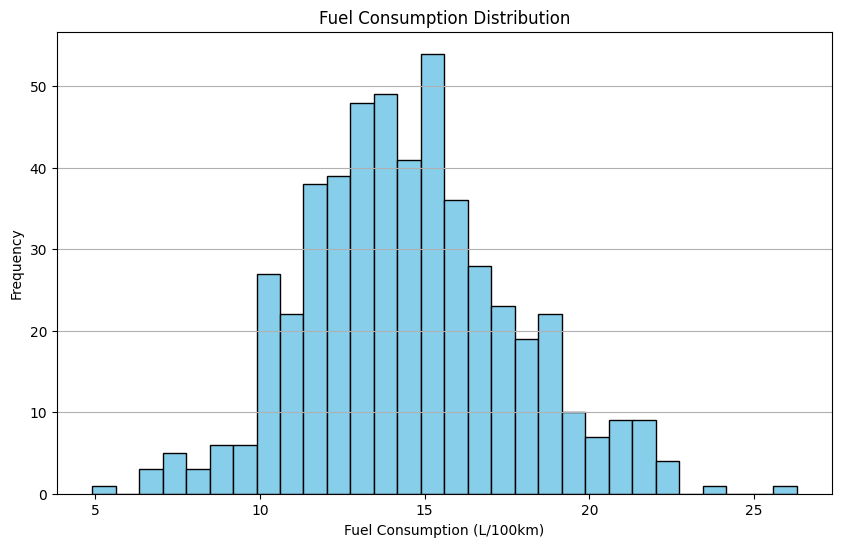

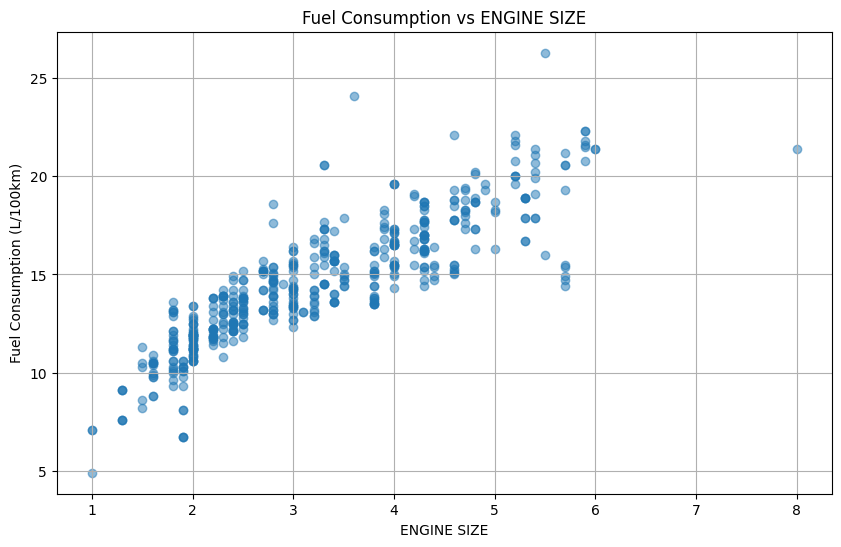

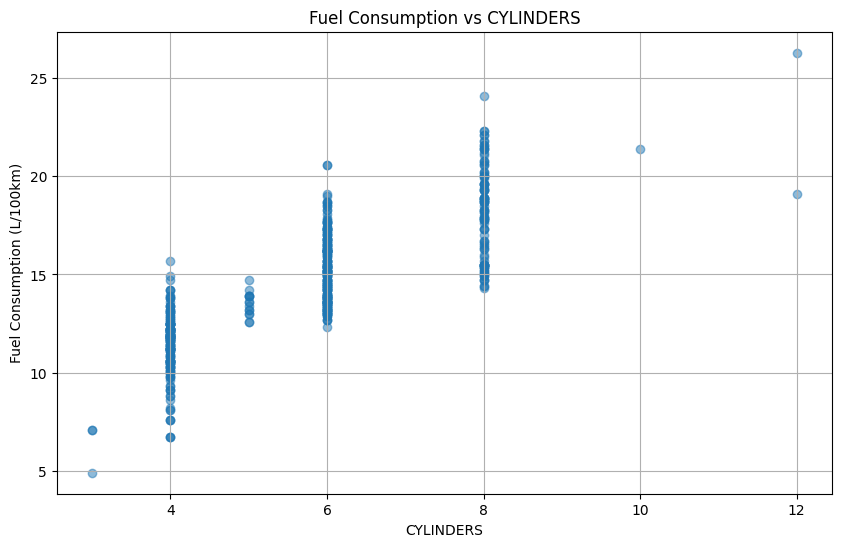

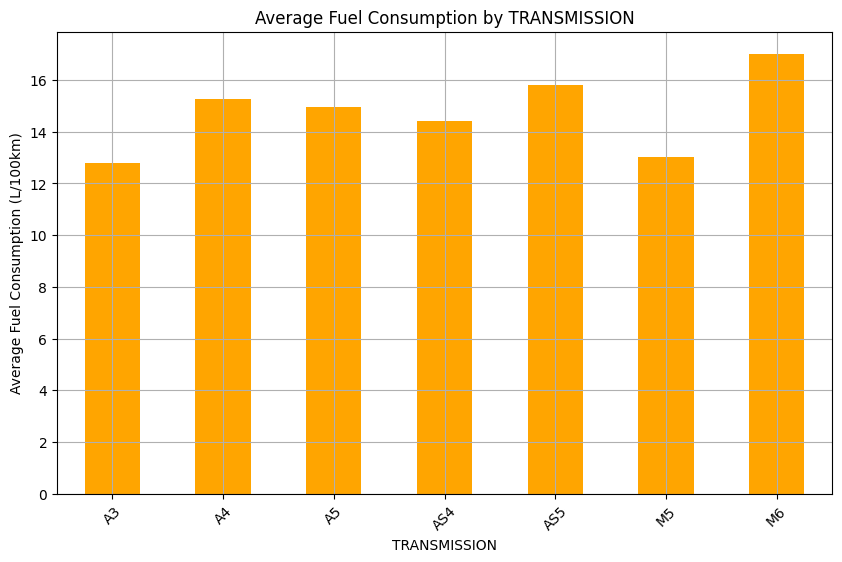

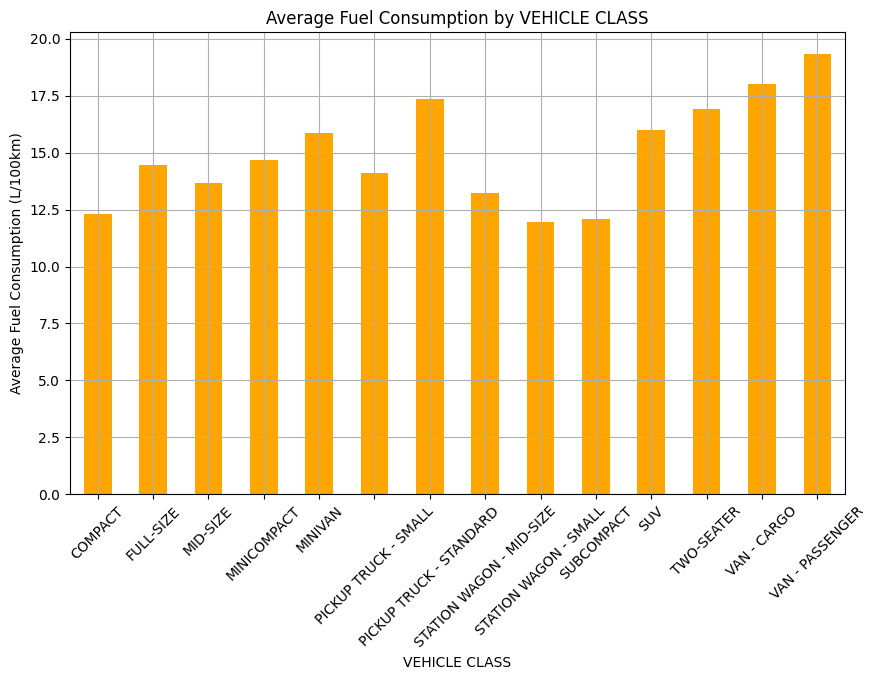

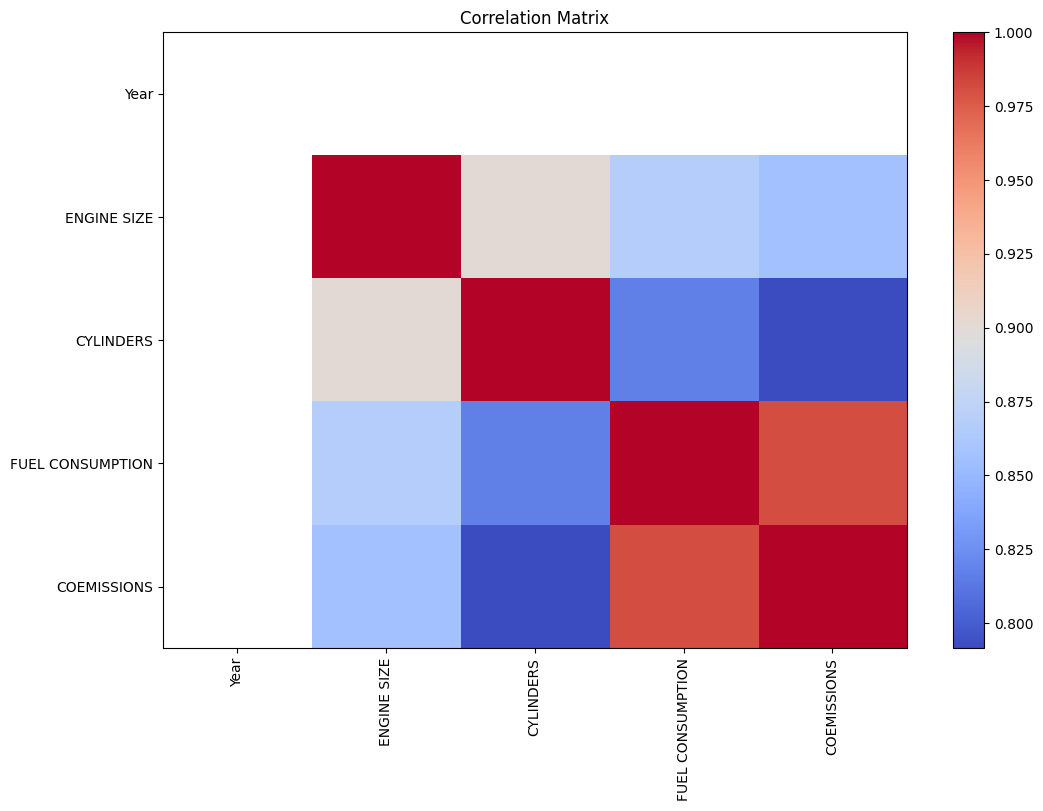


Data exploration completed. Please check the graphs and statistical summaries to identify trends and patterns that can help in building the models.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed data
data_path = 'fuel_train.csv'  # Update this path if needed
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Visualize Fuel Consumption distribution
plt.figure(figsize=(10, 6))
plt.hist(df['FUEL CONSUMPTION'], bins=30, color='skyblue', edgecolor='black')
plt.title('Fuel Consumption Distribution')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Explore relationships between features and Fuel Consumption
features = ['ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'VEHICLE CLASS']

# Plot Fuel Consumption against each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    if df[feature].dtype == 'object':
        df.groupby(feature)['FUEL CONSUMPTION'].mean().plot(kind='bar', color='orange')
        plt.title(f'Average Fuel Consumption by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Average Fuel Consumption (L/100km)')
        plt.xticks(rotation=45)
    else:
        plt.scatter(df[feature], df['FUEL CONSUMPTION'], alpha=0.5)
        plt.title(f'Fuel Consumption vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Fuel Consumption (L/100km)')
    plt.grid()
    plt.show()

# Analyze trends over time if a time-related feature exists (e.g., Year)
# Assuming 'YEAR' is a feature in your dataset
if 'YEAR' in df.columns:
    avg_consumption_per_year = df.groupby('YEAR')['FUEL CONSUMPTION'].mean()
    plt.figure(figsize=(10, 6))
    avg_consumption_per_year.plot(kind='line', marker='o', color='green')
    plt.title('Average Fuel Consumption Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Fuel Consumption (L/100km)')
    plt.grid()
    plt.show()

# Correlation Matrix (only for numeric columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

# Conclusion
print("\nData exploration completed. Please check the graphs and statistical summaries to identify trends and patterns that can help in building the models.")
